In [1]:
# utilizado para manejos de directorios y rutas
import os
import math
# Computacion vectorial y cientifica para python
import numpy as np
# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot

In [2]:
data = np.genfromtxt('winequality-red.csv',delimiter=',')
trainPorcen = int(len(data)/100*80)
testPorcen = int(len(data)/100*20)
print(trainPorcen, testPorcen)

X = data[:,:11]
y = data[:, 11]
# y = np.array([int(e) for e in y])
# y = np.squeeze(y)
m = y.size


1279 319


In [3]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma
    
    return X_norm, mu, sigma

In [4]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print(X_norm.shape,mu.shape,sigma.shape)
print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

(1599, 11) (11,) (11,)
[[ 7.4    0.7    0.    ...  3.51   0.56   9.4  ]
 [ 7.8    0.88   0.    ...  3.2    0.68   9.8  ]
 [ 7.8    0.76   0.04  ...  3.26   0.65   9.8  ]
 ...
 [ 6.3    0.51   0.13  ...  3.42   0.75  11.   ]
 [ 5.9    0.645  0.12  ...  3.57   0.71  10.2  ]
 [ 6.     0.31   0.47  ...  3.39   0.66  11.   ]]
Media calculada: [ 8.31963727  0.52782051  0.27097561  2.5388055   0.08746654 15.87492183
 46.46779237  0.99674668  3.3111132   0.65814884 10.42298311]
Desviación estandar calculada: [1.74055180e+00 1.79003704e-01 1.94740214e-01 1.40948711e+00
 4.70505826e-02 1.04568856e+01 3.28850367e+01 1.88674370e-03
 1.54338181e-01 1.69453967e-01 1.06533430e+00]
[[-0.52835961  0.96187667 -1.39147228 ...  1.28864292 -0.57920652
  -0.96024611]
 [-0.29854743  1.96744245 -1.39147228 ... -0.7199333   0.1289504
  -0.58477711]
 [-0.29854743  1.29706527 -1.18607043 ... -0.33117661 -0.04808883
  -0.58477711]
 ...
 [-1.1603431  -0.09955388 -0.72391627 ...  0.70550789  0.54204194
   0.5416298

In [5]:
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [6]:
print(X.shape)

(1599, 12)


In [7]:
X_train = X[:trainPorcen, :12]
y_train = y[:trainPorcen]

X_test = X[trainPorcen: , :12]
y_test = y[trainPorcen:]
m = y_train.size

print(X_train.shape[1])
print(y_train)
print(X_test.shape)
print(y_test.shape)

12
[5. 5. 5. ... 4. 6. 6.]
(320, 12)
(320,)


In [8]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento
    
    J = 0
    
    h = np.dot(X, theta)
    
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    
    return J


In [9]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    
    # Inicializa algunos valores 
    m = y.shape[0] # numero de ejemplos de entrenamiento
    
    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    
    J_history = []
    
    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))
    
    return theta, J_history

theta calculado por el descenso por el gradiente: [ 5.6565126   0.09855837 -0.19447178 -0.05179352  0.02448612 -0.07166389
  0.01688385 -0.0986148  -0.07499274 -0.02095711  0.13756471  0.28616441]
(320, 12) (11,) (11,)
[ 5.6565126   0.09855837 -0.19447178 -0.05179352  0.02448612 -0.07166389
  0.01688385 -0.0986148  -0.07499274 -0.02095711  0.13756471  0.28616441]
51.112912128607846
El precio predecido para una casa de 1650 sq-ft y 3 dormitorios (usando el descenso por el gradiente): $51


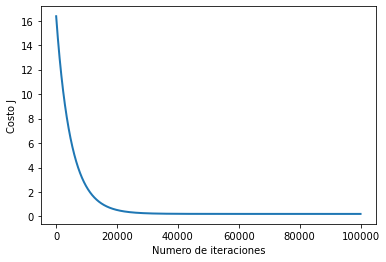

In [10]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.0001
num_iters = 100000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(12)
theta, J_history = gradientDescentMulti(X_train, y_train, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# Estimar el precio para una casa de 1650 sq-ft, con 3 dormitorios
X_array = X_test[15]
print(X_test.shape, mu.shape, sigma.shape)
X_array[1:12] = (X_array[1:12] - mu) / sigma
print(theta)
price = np.dot(X_array, theta)   # Se debe cambiar esto
print(price)
print('El precio predecido para una casa de 1650 sq-ft y 3 dormitorios (usando el descenso por el gradiente): ${:.0f}'.format(price))

In [11]:
# Cargar datos
import math
data = np.genfromtxt('winequality-red.csv',delimiter=',')
trainPorcen = int(len(data)/100*90)
testPorcen = int(len(data)/100*10)
print(trainPorcen, testPorcen)

X = data[:,:11]
y = data[:, 11]
y = np.array([int(e) for e in y])
y = np.squeeze(y)

m = y.size
X = np.concatenate([np.ones((m, 1)), X], axis=1)

X_train = X[:trainPorcen, :12]
y_train = y[:trainPorcen]

X_test = X[trainPorcen: , :12]
y_test = y[trainPorcen:]
m = y_train.size
print(X_test[1])

1439 159
[ 1.      7.2     0.37    0.32    2.      0.062  15.     28.      0.9947
  3.23    0.73   11.3   ]


In [12]:
def normalEqn(X, y):
  
    theta = np.zeros(X.shape[1])
    
    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
    
    return theta

In [13]:
# Calcula los parametros con la ecuación de la normal
theta = normalEqn(X_train, y_train);

# Muestra los resultados optenidos a partir de la aplicación de la ecuación de la normal
print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)));

# Estimar el precio para una casa de superficie de 1650 sq-ft y tres dormitorios
# print(X_test[1])
# print(y_test[1])
pred = []
# for i in range(X_test.shape[0]):
# #     X_array = X_test[88]
# #     print(test)
#     price = np.dot(X_test[i], theta)
# #     print(math.ceil(price), y_test[i])
#     pred.append(math.ceil(price))
# #     print('Precio predecido para una cada de superficie de 1650 sq-ft y 3 dormitorios (usando la ecuación de la normal): ${:.0f}'.format(price))
    
for test in X_test:
#     X_array = X_test[88]
#     print(test)
    price = np.dot(test, theta)
#     print(int(price))
    pred.append(int(price))
#     print('Precio predecido para una cada de superficie de 1650 sq-ft y 3 dormitorios (usando la ecuación de la normal): ${:.0f}'.format(price))

print('Test Set Accuracy: %f' % (np.mean(pred == y_test[:]) * 100))



Theta calculado a partir de la ecuación de la normal: [ 2.63868777e+01  2.95598220e-02 -1.04640056e+00 -1.22025213e-01
  1.71080915e-02 -1.77262620e+00  3.76492834e-03 -3.53000007e-03
 -2.27863088e+01 -2.53057789e-01  8.85502956e-01  2.66780573e-01]
Test Set Accuracy: 45.000000
